## Image Basics with OpenCV

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [12]:
img = cv2.imread('DATA/00-puppy.jpg')
type(img)

numpy.ndarray

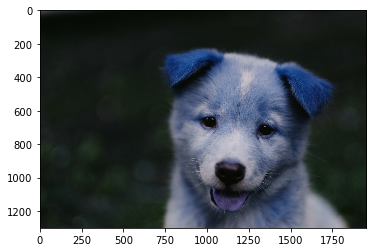

In [13]:
plt.imshow(img)

### Anomaly of varied order of RGB between image on matplotlib and opencv2

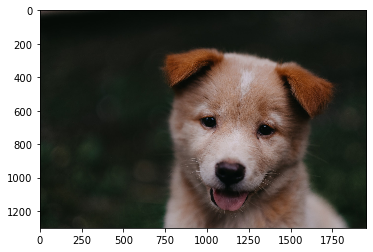

In [14]:
# Matplotlib - RGB
# OpenCV - BGR

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [15]:
img_gray = cv2.imread('DATA/00-puppy.jpg', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
# Notice one depth removed i.e the colors

(1300, 1950)


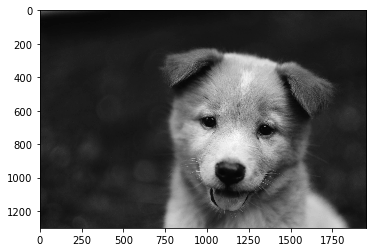

In [16]:
plt.imshow(img_gray, cmap = 'gray')

## Resizing images

In [17]:
# Actual shape
print(img_rgb.shape)

(1300, 1950, 3)


(2600, 3900, 3)


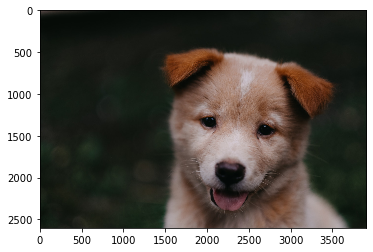

In [20]:
# Resized image
# interpolation is used here for the resizing
resize_factor = 2
width = img_rgb.shape[1] * resize_factor
height = img_rgb.shape[0] * resize_factor
img_resized = cv2.resize(img_rgb, (width, height))
print(img_resized.shape)
plt.imshow(img_resized)

(650, 975, 3)


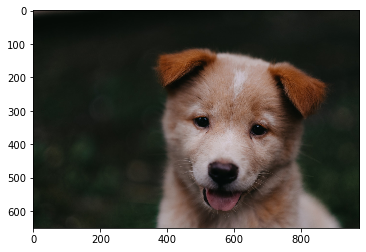

In [21]:
# Method 2 Resize
w_ratio = 0.5
h_ratio = 0.5
img_resized2 = cv2.resize(img_rgb, (0,0), img_rgb, w_ratio, h_ratio)
print(img_resized2.shape)
plt.imshow(img_resized2)

## Flipping an image

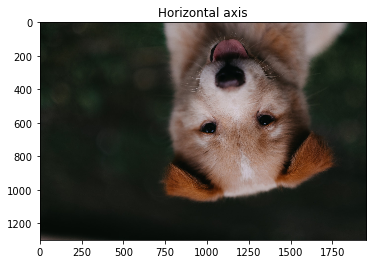

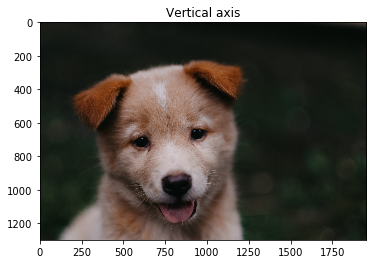

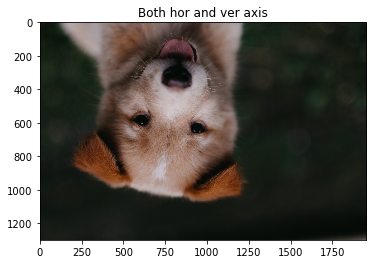

In [24]:
# axis 0

plt.figure(0)
plt.title("Horizontal axis")
img_flip = cv2.flip(img_rgb, 0)
plt.imshow(img_flip)

plt.figure(1)
plt.title("Vertical axis")
img_flip = cv2.flip(img_rgb, 1)
plt.imshow(img_flip)

plt.figure(2)
plt.title("Both hor and ver axis")
img_flip = cv2.flip(img_rgb, -1)
plt.imshow(img_flip)

## Write image to file

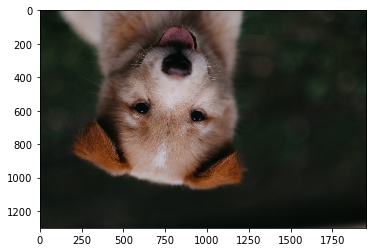

In [28]:
cv2.imwrite('DATA/01-puppy.png', img_flip)
img_read = cv2.imread('DATA/01-puppy.png')
plt.imshow(img_read)

## Resizing the canvas to fit the image

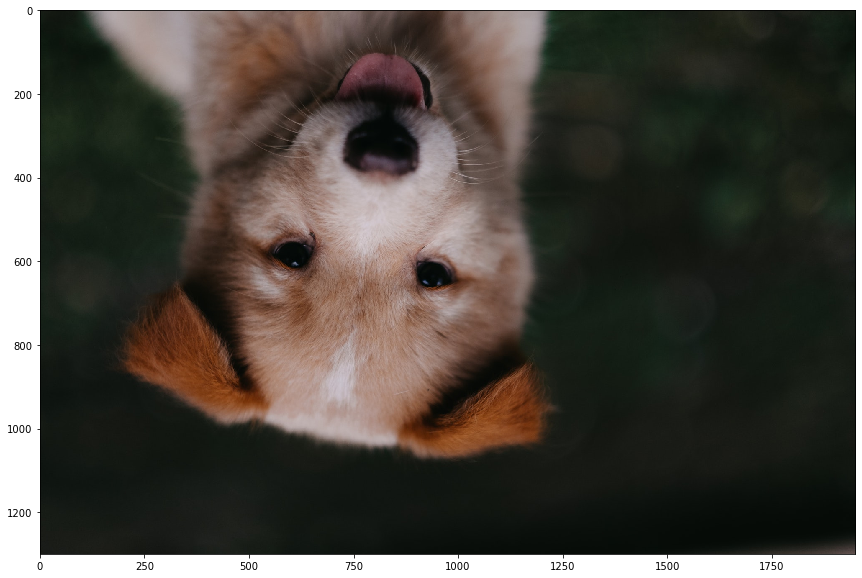

In [31]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.imshow(img_read)

## Open image using python script outside Jupyter notebook i.e OpenCV window

In [34]:
# Image displays on a separate image
# Image display window is not resizeable
img = cv2.imread('DATA/00-puppy.jpg')
# Note the use of OpenCV to display instead of Matplotlib
cv2.imshow('Puppy', img)
cv2.waitKey()

-1

## Drawing on Images

### 1. Draw rectangles

(512, 512, 3)


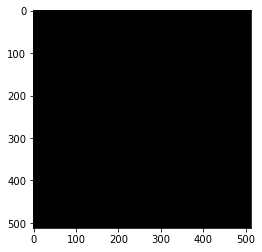

In [41]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)
print(blank_img.shape)
plt.imshow(blank_img)

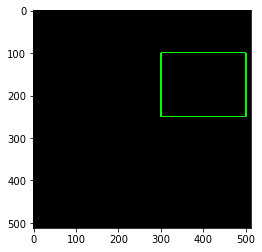

In [42]:
# pt1 = represents the top left corner of rect
# pt2 = bottom right corner of rect

blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

cv2.rectangle(blank_img, pt1 = (300, 100), pt2 = (500, 250), color = (0, 255, 0), thickness = 2)
plt.imshow(blank_img)

(206, 206)
(306, 306)


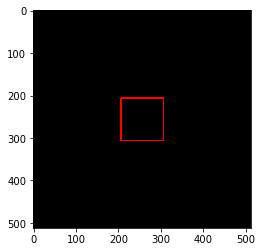

In [48]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

resize_fact = 50
mid_pt = (blank_img.shape[0] / 2, blank_img.shape[1] / 2) 
pt1_rect = (int(mid_pt[0] - resize_fact), int(mid_pt[1] - resize_fact))
pt2_rect = (int(mid_pt[0] + resize_fact), int(mid_pt[1] + resize_fact))

cv2.rectangle(blank_img, pt1 = pt1_rect, pt2 = pt2_rect, color = (255,0,0), thickness = 2)
plt.imshow(blank_img)

### 2. Draw Circles

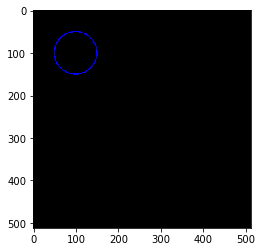

In [54]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

cv2.circle(img = blank_img, center = (100, 100), radius = 50, color = (0,0,255), thickness = 2)
plt.imshow(blank_img)

#### Filled circles

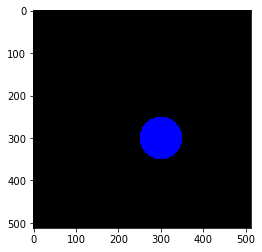

In [58]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

# Set the thickness as -1
cv2.circle(img = blank_img, center = (300, 300), radius = 50, color = (0,0,255), thickness = -1)
plt.imshow(blank_img)

### 3. Lines

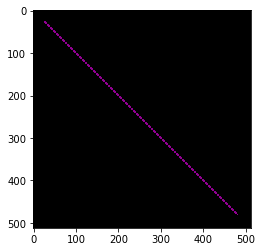

In [57]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

# Set the thickness as -1
cv2.line(img = blank_img, pt1 = (25, 25), pt2 = (480, 480), color = (144,0,144), thickness = 2)
plt.imshow(blank_img)

### 4. Text

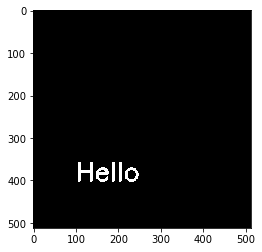

In [62]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int16)

font = cv2.FONT_HERSHEY_SIMPLEX

# org represents the bottom left corner of the text which is considered /
# as the origin for the text
cv2.putText(blank_img, text = "Hello", org = (100, 400), fontFace = font, fontScale = 2, color = (255, 255, 255), thickness = 5, lineType = cv2.LINE_AA)

plt.imshow(blank_img)

### 5. Custom Polygons

(5, 2)
(5, 1, 2)


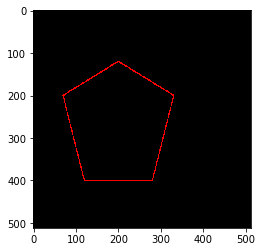

In [71]:
blank_img = np.zeros(shape = (512, 512, 3), dtype=np.int32)

# define the vertices for the polygon
vertices = np.array([ [70, 200], [200, 120], [330, 200], [280, 400], [120, 400]], dtype = np.int32)

# Reshape the vertices into 3 dimensions as OpenCV wants it
print(vertices.shape)

# (-1,1,2) - '-1' represents maintain the dimensions as in vertices ; 
# '1' - 1 (5,2) point coordinates for every color pane ; 
# '2' - coordinates X and Y
pts = vertices.reshape(-1,1,2)
print(pts.shape)

# Draw the polygon
cv2.polylines(blank_img, [pts], isClosed = True, color = (255,0,0), thickness = 2)
plt.imshow(blank_img)

## Draw contours using the Mouse with event handling on image